# Exploring Neural Audio Synthesis with NSynth

## Parag Mital

There is a lot to explore with NSynth.  This notebook explores just a taste of what's possible including how to encode and decode, timestretch, and interpolate sounds.  Also check out the [blog post](https://magenta.tensorflow.org/nsynth-fastgen) for more examples including two compositions created with Ableton Live.  If you are interested in learning more, checkout my [online course on Kadenze](https://www.kadenze.com/programs/creative-applications-of-deep-learning-with-tensorflow) where we talk about Magenta and NSynth in more depth.

## Part 1: Encoding and Decoding

We'll walkthrough using the source code to encode and decode some audio.  This is the most basic thing we can do with NSynth, and it will take at least about 6 minutes per 1 second of audio to perform on a GPU, though this will get faster!

I'll first show you how to encode some audio.  This is basically saying, here is some audio, now put it into the trained model.  It's like the encoding of an MP3 file.  It takes some raw audio, and represents it using some really reduced down representation of the raw audio.  NSynth works similarly, but we can actually mess with the encoding to do some awesome stuff.  You can for instance, mix it with other encodings, or slow it down, or speed it up.  You can potentially even remove parts of it, mix many different encodings together, and hopefully just explore ideas yet to be thought of.  After you've created your encoding, you have to just generate, or decode it, just like what an audio player does to an MP3 file.

First, to install Magenta, follow their setup guide here: https://github.com/tensorflow/magenta#installation - then import some packages:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


Now we'll load up a sound I downloaded from freesound.org.  The `utils.load_audio` method will resample this to the required sample rate of 16000.  I'll load in 40000 samples of this beat which should end up being a pretty good loop:

In [3]:
# from https://www.freesound.org/people/MustardPlug/sounds/395058/
fname = 'recording.wav'
sr = 16000
audio = utils.load_audio(fname, sample_length=40000, sr=sr)
sample_length = audio.shape[0]
print('{} samples, {} seconds'.format(sample_length, sample_length / float(sr)))

40000 samples, 2.5 seconds


## Encoding

We'll now encode some audio using the pre-trained NSynth model (download from: http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar).  This is pretty fast, and takes about 3 seconds per 1 second of audio on my NVidia 1080 GPU.  This will give us a 125 x 16 dimension encoding for every 4 seconds of audio which we can then decode, or resynthesize.  We'll try a few things, including just leaving it alone and reconstructing it as is.  But then we'll also try some fun transformations of the encoding and see what's possible from there.

```help(fastgen.encode)
Help on function encode in module magenta.models.nsynth.wavenet.fastgen:

encode(wav_data, checkpoint_path, sample_length=64000)
    Generate an array of embeddings from an array of audio.
      Args:
        wav_data: Numpy array [batch_size, sample_length]
        checkpoint_path: Location of the pretrained model.
        sample_length: The total length of the final wave file, padded with 0s.
      Returns:
        encoding: a [mb, 125, 16] encoding (for 64000 sample audio file).
```

In [4]:
%time encoding = fastgen.encode(audio, 'wavenet-ckpt/model.ckpt-200000', sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


CPU times: user 25 s, sys: 1.93 s, total: 26.9 s
Wall time: 11.9 s


This returns a 3-dimensional tensor representing the encoding of the audio.  The first dimension of the encoding represents the batch dimension.  We could have passed in many audio files at once and the process would be much faster.  For now we've just passed in one audio file.

In [5]:
print(encoding.shape)

We'll also save the encoding so that we can use it again later:

In [6]:
np.save(fname + '.npy', encoding)

Let's take a look at the encoding of this audio file.  Think of these as 16 channels of sounds all mixed together (though with a lot of caveats):

Text(0.5,1,'NSynth Encoding')

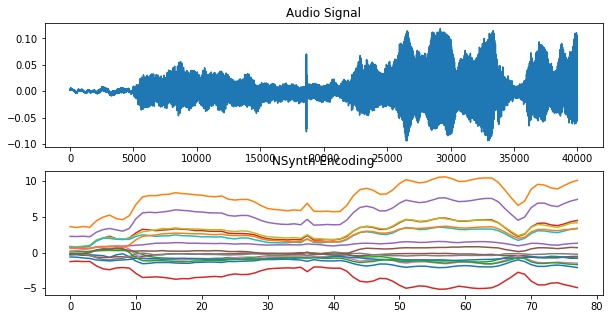

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].plot(audio);
axs[0].set_title('Audio Signal')
axs[1].plot(encoding[0]);
axs[1].set_title('NSynth Encoding')

You should be able to pretty clearly see a sort of beat like pattern in both the signal and the encoding.

## Decoding

Now we can decode the encodings as is.  This is the process that takes awhile, though it used to be so long that you wouldn't even dare trying it.  There is still plenty of room for improvement and I'm sure it will get faster very soon.

```
help(fastgen.synthesize)
Help on function synthesize in module magenta.models.nsynth.wavenet.fastgen:

synthesize(encodings, save_paths, checkpoint_path='model.ckpt-200000', samples_per_save=1000)
    Synthesize audio from an array of embeddings.
      Args:
        encodings: Numpy array with shape [batch_size, time, dim].
        save_paths: Iterable of output file names.
        checkpoint_path: Location of the pretrained model. [model.ckpt-200000]
        samples_per_save: Save files after every amount of generated samples.
```        

In [7]:
%time fastgen.synthesize(encoding, save_paths=['gen_' + fname], checkpoint_path = 'wavenet-ckpt/model.ckpt-200000', samples_per_save=sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


INFO:tensorflow:Sample: 0


INFO:tensorflow:Saving: gen_recording.wav


INFO:tensorflow:Sample: 100


INFO:tensorflow:Sample: 200


INFO:tensorflow:Sample: 300


INFO:tensorflow:Sample: 400


INFO:tensorflow:Sample: 500


INFO:tensorflow:Sample: 600


INFO:tensorflow:Sample: 700


INFO:tensorflow:Sample: 800


INFO:tensorflow:Sample: 900


INFO:tensorflow:Sample: 1000


INFO:tensorflow:Sample: 1100


INFO:tensorflow:Sample: 1200


INFO:tensorflow:Sample: 1300


INFO:tensorflow:Sample: 1400


INFO:tensorflow:Sample: 1500


INFO:tensorflow:Sample: 1600


INFO:tensorflow:Sample: 1700


INFO:tensorflow:Sample: 1800


INFO:tensorflow:Sample: 1900


INFO:tensorflow:Sample: 2000


INFO:tensorflow:Sample: 2100


INFO:tensorflow:Sample: 2200


INFO:tensorflow:Sample: 2300


INFO:tensorflow:Sample: 2400


INFO:tensorflow:Sample: 2500


INFO:tensorflow:Sample: 2600


INFO:tensorflow:Sample: 2700


INFO:tensorflow:Sample: 2800


INFO:tensorflow:Sample: 2900


INFO:tensorflow:Sample: 3000


INFO:tensorflow:Sample: 3100


INFO:tensorflow:Sample: 3200


INFO:tensorflow:Sample: 3300


INFO:tensorflow:Sample: 3400


INFO:tensorflow:Sample: 3500


INFO:tensorflow:Sample: 3600


INFO:tensorflow:Sample: 3700


INFO:tensorflow:Sample: 3800


INFO:tensorflow:Sample: 3900


INFO:tensorflow:Sample: 4000


INFO:tensorflow:Sample: 4100


INFO:tensorflow:Sample: 4200


INFO:tensorflow:Sample: 4300


INFO:tensorflow:Sample: 4400


INFO:tensorflow:Sample: 4500


INFO:tensorflow:Sample: 4600


INFO:tensorflow:Sample: 4700


INFO:tensorflow:Sample: 4800


INFO:tensorflow:Sample: 4900


INFO:tensorflow:Sample: 5000


INFO:tensorflow:Sample: 5100


INFO:tensorflow:Sample: 5200


INFO:tensorflow:Sample: 5300


INFO:tensorflow:Sample: 5400


INFO:tensorflow:Sample: 5500


INFO:tensorflow:Sample: 5600


INFO:tensorflow:Sample: 5700


INFO:tensorflow:Sample: 5800


INFO:tensorflow:Sample: 5900


INFO:tensorflow:Sample: 6000


INFO:tensorflow:Sample: 6100


INFO:tensorflow:Sample: 6200


INFO:tensorflow:Sample: 6300


INFO:tensorflow:Sample: 6400


INFO:tensorflow:Sample: 6500


INFO:tensorflow:Sample: 6600


INFO:tensorflow:Sample: 6700


INFO:tensorflow:Sample: 6800


INFO:tensorflow:Sample: 6900


INFO:tensorflow:Sample: 7000


INFO:tensorflow:Sample: 7100


INFO:tensorflow:Sample: 7200


INFO:tensorflow:Sample: 7300


INFO:tensorflow:Sample: 7400


INFO:tensorflow:Sample: 7500


INFO:tensorflow:Sample: 7600


INFO:tensorflow:Sample: 7700


INFO:tensorflow:Sample: 7800


INFO:tensorflow:Sample: 7900


INFO:tensorflow:Sample: 8000


INFO:tensorflow:Sample: 8100


INFO:tensorflow:Sample: 8200


INFO:tensorflow:Sample: 8300


INFO:tensorflow:Sample: 8400


INFO:tensorflow:Sample: 8500


INFO:tensorflow:Sample: 8600


INFO:tensorflow:Sample: 8700


INFO:tensorflow:Sample: 8800


INFO:tensorflow:Sample: 8900


INFO:tensorflow:Sample: 9000


INFO:tensorflow:Sample: 9100


INFO:tensorflow:Sample: 9200


INFO:tensorflow:Sample: 9300


INFO:tensorflow:Sample: 9400


INFO:tensorflow:Sample: 9500


INFO:tensorflow:Sample: 9600


INFO:tensorflow:Sample: 9700


INFO:tensorflow:Sample: 9800


INFO:tensorflow:Sample: 9900


INFO:tensorflow:Sample: 10000


INFO:tensorflow:Sample: 10100


INFO:tensorflow:Sample: 10200


INFO:tensorflow:Sample: 10300


INFO:tensorflow:Sample: 10400


INFO:tensorflow:Sample: 10500


INFO:tensorflow:Sample: 10600


INFO:tensorflow:Sample: 10700


INFO:tensorflow:Sample: 10800


INFO:tensorflow:Sample: 10900


INFO:tensorflow:Sample: 11000


INFO:tensorflow:Sample: 11100


INFO:tensorflow:Sample: 11200


INFO:tensorflow:Sample: 11300


INFO:tensorflow:Sample: 11400


INFO:tensorflow:Sample: 11500


INFO:tensorflow:Sample: 11600


INFO:tensorflow:Sample: 11700


INFO:tensorflow:Sample: 11800


INFO:tensorflow:Sample: 11900


INFO:tensorflow:Sample: 12000


INFO:tensorflow:Sample: 12100


INFO:tensorflow:Sample: 12200


INFO:tensorflow:Sample: 12300


INFO:tensorflow:Sample: 12400


INFO:tensorflow:Sample: 12500


INFO:tensorflow:Sample: 12600


INFO:tensorflow:Sample: 12700


INFO:tensorflow:Sample: 12800


INFO:tensorflow:Sample: 12900


INFO:tensorflow:Sample: 13000


INFO:tensorflow:Sample: 13100


INFO:tensorflow:Sample: 13200


INFO:tensorflow:Sample: 13300


INFO:tensorflow:Sample: 13400


INFO:tensorflow:Sample: 13500


INFO:tensorflow:Sample: 13600


INFO:tensorflow:Sample: 13700


INFO:tensorflow:Sample: 13800


INFO:tensorflow:Sample: 13900


INFO:tensorflow:Sample: 14000


INFO:tensorflow:Sample: 14100


INFO:tensorflow:Sample: 14200


INFO:tensorflow:Sample: 14300


INFO:tensorflow:Sample: 14400


INFO:tensorflow:Sample: 14500


INFO:tensorflow:Sample: 14600


INFO:tensorflow:Sample: 14700


INFO:tensorflow:Sample: 14800


INFO:tensorflow:Sample: 14900


INFO:tensorflow:Sample: 15000


INFO:tensorflow:Sample: 15100


INFO:tensorflow:Sample: 15200


INFO:tensorflow:Sample: 15300


INFO:tensorflow:Sample: 15400


INFO:tensorflow:Sample: 15500


INFO:tensorflow:Sample: 15600


INFO:tensorflow:Sample: 15700


INFO:tensorflow:Sample: 15800


INFO:tensorflow:Sample: 15900


INFO:tensorflow:Sample: 16000


INFO:tensorflow:Sample: 16100


INFO:tensorflow:Sample: 16200


INFO:tensorflow:Sample: 16300


INFO:tensorflow:Sample: 16400


INFO:tensorflow:Sample: 16500


INFO:tensorflow:Sample: 16600


INFO:tensorflow:Sample: 16700


INFO:tensorflow:Sample: 16800


INFO:tensorflow:Sample: 16900


INFO:tensorflow:Sample: 17000


INFO:tensorflow:Sample: 17100


INFO:tensorflow:Sample: 17200


INFO:tensorflow:Sample: 17300


INFO:tensorflow:Sample: 17400


INFO:tensorflow:Sample: 17500


INFO:tensorflow:Sample: 17600


INFO:tensorflow:Sample: 17700


INFO:tensorflow:Sample: 17800


INFO:tensorflow:Sample: 17900


INFO:tensorflow:Sample: 18000


INFO:tensorflow:Sample: 18100


INFO:tensorflow:Sample: 18200


INFO:tensorflow:Sample: 18300


INFO:tensorflow:Sample: 18400


INFO:tensorflow:Sample: 18500


INFO:tensorflow:Sample: 18600


INFO:tensorflow:Sample: 18700


INFO:tensorflow:Sample: 18800


INFO:tensorflow:Sample: 18900


INFO:tensorflow:Sample: 19000


INFO:tensorflow:Sample: 19100


INFO:tensorflow:Sample: 19200


INFO:tensorflow:Sample: 19300


INFO:tensorflow:Sample: 19400


INFO:tensorflow:Sample: 19500


INFO:tensorflow:Sample: 19600


INFO:tensorflow:Sample: 19700


INFO:tensorflow:Sample: 19800


INFO:tensorflow:Sample: 19900


INFO:tensorflow:Sample: 20000


INFO:tensorflow:Sample: 20100


INFO:tensorflow:Sample: 20200


INFO:tensorflow:Sample: 20300


INFO:tensorflow:Sample: 20400


INFO:tensorflow:Sample: 20500


INFO:tensorflow:Sample: 20600


INFO:tensorflow:Sample: 20700


INFO:tensorflow:Sample: 20800


INFO:tensorflow:Sample: 20900


INFO:tensorflow:Sample: 21000


INFO:tensorflow:Sample: 21100


INFO:tensorflow:Sample: 21200


INFO:tensorflow:Sample: 21300


INFO:tensorflow:Sample: 21400


INFO:tensorflow:Sample: 21500


INFO:tensorflow:Sample: 21600


INFO:tensorflow:Sample: 21700


INFO:tensorflow:Sample: 21800


INFO:tensorflow:Sample: 21900


INFO:tensorflow:Sample: 22000


INFO:tensorflow:Sample: 22100


INFO:tensorflow:Sample: 22200


INFO:tensorflow:Sample: 22300


INFO:tensorflow:Sample: 22400


INFO:tensorflow:Sample: 22500


INFO:tensorflow:Sample: 22600


INFO:tensorflow:Sample: 22700


INFO:tensorflow:Sample: 22800


INFO:tensorflow:Sample: 22900


INFO:tensorflow:Sample: 23000


INFO:tensorflow:Sample: 23100


INFO:tensorflow:Sample: 23200


INFO:tensorflow:Sample: 23300


INFO:tensorflow:Sample: 23400


INFO:tensorflow:Sample: 23500


INFO:tensorflow:Sample: 23600


INFO:tensorflow:Sample: 23700


INFO:tensorflow:Sample: 23800


INFO:tensorflow:Sample: 23900


INFO:tensorflow:Sample: 24000


INFO:tensorflow:Sample: 24100


INFO:tensorflow:Sample: 24200


INFO:tensorflow:Sample: 24300


INFO:tensorflow:Sample: 24400


INFO:tensorflow:Sample: 24500


INFO:tensorflow:Sample: 24600


INFO:tensorflow:Sample: 24700


INFO:tensorflow:Sample: 24800


INFO:tensorflow:Sample: 24900


INFO:tensorflow:Sample: 25000


INFO:tensorflow:Sample: 25100


INFO:tensorflow:Sample: 25200


INFO:tensorflow:Sample: 25300


INFO:tensorflow:Sample: 25400


INFO:tensorflow:Sample: 25500


INFO:tensorflow:Sample: 25600


INFO:tensorflow:Sample: 25700


INFO:tensorflow:Sample: 25800


INFO:tensorflow:Sample: 25900


INFO:tensorflow:Sample: 26000


INFO:tensorflow:Sample: 26100


INFO:tensorflow:Sample: 26200


INFO:tensorflow:Sample: 26300


INFO:tensorflow:Sample: 26400


INFO:tensorflow:Sample: 26500


INFO:tensorflow:Sample: 26600


INFO:tensorflow:Sample: 26700


INFO:tensorflow:Sample: 26800


INFO:tensorflow:Sample: 26900


INFO:tensorflow:Sample: 27000


INFO:tensorflow:Sample: 27100


INFO:tensorflow:Sample: 27200


INFO:tensorflow:Sample: 27300


INFO:tensorflow:Sample: 27400


INFO:tensorflow:Sample: 27500


INFO:tensorflow:Sample: 27600


INFO:tensorflow:Sample: 27700


INFO:tensorflow:Sample: 27800


INFO:tensorflow:Sample: 27900


INFO:tensorflow:Sample: 28000


INFO:tensorflow:Sample: 28100


INFO:tensorflow:Sample: 28200


INFO:tensorflow:Sample: 28300


INFO:tensorflow:Sample: 28400


INFO:tensorflow:Sample: 28500


INFO:tensorflow:Sample: 28600


INFO:tensorflow:Sample: 28700


INFO:tensorflow:Sample: 28800


INFO:tensorflow:Sample: 28900


INFO:tensorflow:Sample: 29000


INFO:tensorflow:Sample: 29100


INFO:tensorflow:Sample: 29200


INFO:tensorflow:Sample: 29300


INFO:tensorflow:Sample: 29400


INFO:tensorflow:Sample: 29500


INFO:tensorflow:Sample: 29600


INFO:tensorflow:Sample: 29700


INFO:tensorflow:Sample: 29800


INFO:tensorflow:Sample: 29900


INFO:tensorflow:Sample: 30000


INFO:tensorflow:Sample: 30100


INFO:tensorflow:Sample: 30200


INFO:tensorflow:Sample: 30300


INFO:tensorflow:Sample: 30400


INFO:tensorflow:Sample: 30500


INFO:tensorflow:Sample: 30600


INFO:tensorflow:Sample: 30700


INFO:tensorflow:Sample: 30800


INFO:tensorflow:Sample: 30900


INFO:tensorflow:Sample: 31000


INFO:tensorflow:Sample: 31100


INFO:tensorflow:Sample: 31200


INFO:tensorflow:Sample: 31300


INFO:tensorflow:Sample: 31400


INFO:tensorflow:Sample: 31500


INFO:tensorflow:Sample: 31600


INFO:tensorflow:Sample: 31700


INFO:tensorflow:Sample: 31800


INFO:tensorflow:Sample: 31900


INFO:tensorflow:Sample: 32000


INFO:tensorflow:Sample: 32100


INFO:tensorflow:Sample: 32200


INFO:tensorflow:Sample: 32300


INFO:tensorflow:Sample: 32400


INFO:tensorflow:Sample: 32500


INFO:tensorflow:Sample: 32600


INFO:tensorflow:Sample: 32700


INFO:tensorflow:Sample: 32800


INFO:tensorflow:Sample: 32900


INFO:tensorflow:Sample: 33000


INFO:tensorflow:Sample: 33100


INFO:tensorflow:Sample: 33200


INFO:tensorflow:Sample: 33300


INFO:tensorflow:Sample: 33400


INFO:tensorflow:Sample: 33500


INFO:tensorflow:Sample: 33600


INFO:tensorflow:Sample: 33700


INFO:tensorflow:Sample: 33800


INFO:tensorflow:Sample: 33900


INFO:tensorflow:Sample: 34000


INFO:tensorflow:Sample: 34100


INFO:tensorflow:Sample: 34200


INFO:tensorflow:Sample: 34300


INFO:tensorflow:Sample: 34400


INFO:tensorflow:Sample: 34500


INFO:tensorflow:Sample: 34600


INFO:tensorflow:Sample: 34700


INFO:tensorflow:Sample: 34800


INFO:tensorflow:Sample: 34900


INFO:tensorflow:Sample: 35000


INFO:tensorflow:Sample: 35100


INFO:tensorflow:Sample: 35200


INFO:tensorflow:Sample: 35300


INFO:tensorflow:Sample: 35400


INFO:tensorflow:Sample: 35500


INFO:tensorflow:Sample: 35600


INFO:tensorflow:Sample: 35700


INFO:tensorflow:Sample: 35800


INFO:tensorflow:Sample: 35900


INFO:tensorflow:Sample: 36000


INFO:tensorflow:Sample: 36100


INFO:tensorflow:Sample: 36200


INFO:tensorflow:Sample: 36300


INFO:tensorflow:Sample: 36400


INFO:tensorflow:Sample: 36500


INFO:tensorflow:Sample: 36600


INFO:tensorflow:Sample: 36700


INFO:tensorflow:Sample: 36800


INFO:tensorflow:Sample: 36900


INFO:tensorflow:Sample: 37000


INFO:tensorflow:Sample: 37100


INFO:tensorflow:Sample: 37200


INFO:tensorflow:Sample: 37300


INFO:tensorflow:Sample: 37400


INFO:tensorflow:Sample: 37500


INFO:tensorflow:Sample: 37600


INFO:tensorflow:Sample: 37700


INFO:tensorflow:Sample: 37800


INFO:tensorflow:Sample: 37900


INFO:tensorflow:Sample: 38000


INFO:tensorflow:Sample: 38100


INFO:tensorflow:Sample: 38200


INFO:tensorflow:Sample: 38300


INFO:tensorflow:Sample: 38400


INFO:tensorflow:Sample: 38500


INFO:tensorflow:Sample: 38600


INFO:tensorflow:Sample: 38700


INFO:tensorflow:Sample: 38800


INFO:tensorflow:Sample: 38900


INFO:tensorflow:Sample: 39000


INFO:tensorflow:Sample: 39100


INFO:tensorflow:Sample: 39200


INFO:tensorflow:Sample: 39300


INFO:tensorflow:Sample: 39400


INFO:tensorflow:Sample: 39500


INFO:tensorflow:Sample: 39600


INFO:tensorflow:Sample: 39700


INFO:tensorflow:Sample: 39800


INFO:tensorflow:Sample: 39900


INFO:tensorflow:Saving: gen_recording.wav


CPU times: user 1h 18min 26s, sys: 5min 36s, total: 1h 24min 2s
Wall time: 25min 9s


After it's done synthesizing, we can see that takes about 6 minutes per 1 second of audio on a non-optimized version of Tensorflow for GPU on an NVidia 1080 GPU.  We can speed things up considerably if we want to do multiple encodings at a time.  We'll see that in just a moment.  Let's first listen to the synthesized audio:

In [8]:
sr = 16000
synthesis = utils.load_audio('gen_' + fname, sample_length=sample_length, sr=sr)

Listening to the audio, the sounds are definitely different.  NSynth seems to apply a sort of gobbly low-pass  that also really doesn't know what to do with the high frequencies.  It is really quite hard to describe, but that is what is so interesting about it.  It has a recognizable, characteristic sound.

Let's try another one.  I'll put the whole workflow for synthesis in two cells, and we can listen to another synthesis of a vocalist singing, "Laaaa":

In [9]:
def load_encoding(fname, sample_length=None, sr=16000, ckpt='wavenet-ckpt/model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

In [22]:
# from https://www.freesound.org/people/maurolupo/sounds/213259/
fname = '213259__maurolupo__girl-sings-laa.wav'
sample_length = 32000
audio, encoding = load_encoding(fname, sample_length)
fastgen.synthesize(
    encoding,
    save_paths=['gen_' + fname],
    checkpoint_path = 'wavenet-ckpt/model.ckpt-200000',
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_' + fname,
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


INFO:tensorflow:Sample: 0


INFO:tensorflow:Saving: gen_213259__maurolupo__girl-sings-laa.wav


INFO:tensorflow:Sample: 100


INFO:tensorflow:Sample: 200


INFO:tensorflow:Sample: 300


INFO:tensorflow:Sample: 400


INFO:tensorflow:Sample: 500


INFO:tensorflow:Sample: 600


INFO:tensorflow:Sample: 700


INFO:tensorflow:Sample: 800


INFO:tensorflow:Sample: 900


INFO:tensorflow:Sample: 1000


INFO:tensorflow:Sample: 1100


INFO:tensorflow:Sample: 1200


INFO:tensorflow:Sample: 1300


INFO:tensorflow:Sample: 1400


INFO:tensorflow:Sample: 1500


INFO:tensorflow:Sample: 1600


INFO:tensorflow:Sample: 1700


INFO:tensorflow:Sample: 1800


INFO:tensorflow:Sample: 1900


INFO:tensorflow:Sample: 2000


INFO:tensorflow:Sample: 2100


INFO:tensorflow:Sample: 2200


INFO:tensorflow:Sample: 2300


INFO:tensorflow:Sample: 2400


INFO:tensorflow:Sample: 2500


INFO:tensorflow:Sample: 2600


INFO:tensorflow:Sample: 2700


INFO:tensorflow:Sample: 2800


INFO:tensorflow:Sample: 2900


INFO:tensorflow:Sample: 3000


INFO:tensorflow:Sample: 3100


INFO:tensorflow:Sample: 3200


INFO:tensorflow:Sample: 3300


INFO:tensorflow:Sample: 3400


INFO:tensorflow:Sample: 3500


INFO:tensorflow:Sample: 3600


INFO:tensorflow:Sample: 3700


INFO:tensorflow:Sample: 3800


INFO:tensorflow:Sample: 3900


INFO:tensorflow:Sample: 4000


INFO:tensorflow:Sample: 4100


INFO:tensorflow:Sample: 4200


INFO:tensorflow:Sample: 4300


INFO:tensorflow:Sample: 4400


INFO:tensorflow:Sample: 4500


INFO:tensorflow:Sample: 4600


INFO:tensorflow:Sample: 4700


INFO:tensorflow:Sample: 4800


INFO:tensorflow:Sample: 4900


INFO:tensorflow:Sample: 5000


INFO:tensorflow:Sample: 5100


INFO:tensorflow:Sample: 5200


INFO:tensorflow:Sample: 5300


INFO:tensorflow:Sample: 5400


INFO:tensorflow:Sample: 5500


INFO:tensorflow:Sample: 5600


INFO:tensorflow:Sample: 5700


INFO:tensorflow:Sample: 5800


INFO:tensorflow:Sample: 5900


INFO:tensorflow:Sample: 6000


INFO:tensorflow:Sample: 6100


INFO:tensorflow:Sample: 6200


INFO:tensorflow:Sample: 6300


INFO:tensorflow:Sample: 6400


INFO:tensorflow:Sample: 6500


INFO:tensorflow:Sample: 6600


INFO:tensorflow:Sample: 6700


INFO:tensorflow:Sample: 6800


INFO:tensorflow:Sample: 6900


INFO:tensorflow:Sample: 7000


INFO:tensorflow:Sample: 7100


INFO:tensorflow:Sample: 7200


INFO:tensorflow:Sample: 7300


INFO:tensorflow:Sample: 7400


INFO:tensorflow:Sample: 7500


INFO:tensorflow:Sample: 7600


INFO:tensorflow:Sample: 7700


INFO:tensorflow:Sample: 7800


INFO:tensorflow:Sample: 7900


INFO:tensorflow:Sample: 8000


INFO:tensorflow:Sample: 8100


INFO:tensorflow:Sample: 8200


INFO:tensorflow:Sample: 8300


INFO:tensorflow:Sample: 8400


INFO:tensorflow:Sample: 8500


INFO:tensorflow:Sample: 8600


INFO:tensorflow:Sample: 8700


INFO:tensorflow:Sample: 8800


INFO:tensorflow:Sample: 8900


INFO:tensorflow:Sample: 9000


INFO:tensorflow:Sample: 9100


INFO:tensorflow:Sample: 9200


INFO:tensorflow:Sample: 9300


INFO:tensorflow:Sample: 9400


INFO:tensorflow:Sample: 9500


INFO:tensorflow:Sample: 9600


INFO:tensorflow:Sample: 9700


INFO:tensorflow:Sample: 9800


INFO:tensorflow:Sample: 9900


INFO:tensorflow:Sample: 10000


INFO:tensorflow:Sample: 10100


INFO:tensorflow:Sample: 10200


INFO:tensorflow:Sample: 10300


INFO:tensorflow:Sample: 10400


INFO:tensorflow:Sample: 10500


INFO:tensorflow:Sample: 10600


INFO:tensorflow:Sample: 10700


INFO:tensorflow:Sample: 10800


INFO:tensorflow:Sample: 10900


INFO:tensorflow:Sample: 11000


INFO:tensorflow:Sample: 11100


INFO:tensorflow:Sample: 11200


INFO:tensorflow:Sample: 11300


INFO:tensorflow:Sample: 11400


INFO:tensorflow:Sample: 11500


INFO:tensorflow:Sample: 11600


INFO:tensorflow:Sample: 11700


INFO:tensorflow:Sample: 11800


INFO:tensorflow:Sample: 11900


INFO:tensorflow:Sample: 12000


INFO:tensorflow:Sample: 12100


INFO:tensorflow:Sample: 12200


INFO:tensorflow:Sample: 12300


INFO:tensorflow:Sample: 12400


INFO:tensorflow:Sample: 12500


INFO:tensorflow:Sample: 12600


INFO:tensorflow:Sample: 12700


INFO:tensorflow:Sample: 12800


INFO:tensorflow:Sample: 12900


INFO:tensorflow:Sample: 13000


INFO:tensorflow:Sample: 13100


INFO:tensorflow:Sample: 13200


INFO:tensorflow:Sample: 13300


INFO:tensorflow:Sample: 13400


INFO:tensorflow:Sample: 13500


INFO:tensorflow:Sample: 13600


INFO:tensorflow:Sample: 13700


INFO:tensorflow:Sample: 13800


INFO:tensorflow:Sample: 13900


INFO:tensorflow:Sample: 14000


INFO:tensorflow:Sample: 14100


INFO:tensorflow:Sample: 14200


INFO:tensorflow:Sample: 14300


INFO:tensorflow:Sample: 14400


INFO:tensorflow:Sample: 14500


INFO:tensorflow:Sample: 14600


INFO:tensorflow:Sample: 14700


INFO:tensorflow:Sample: 14800


INFO:tensorflow:Sample: 14900


INFO:tensorflow:Sample: 15000


INFO:tensorflow:Sample: 15100


INFO:tensorflow:Sample: 15200


INFO:tensorflow:Sample: 15300


INFO:tensorflow:Sample: 15400


INFO:tensorflow:Sample: 15500


INFO:tensorflow:Sample: 15600


INFO:tensorflow:Sample: 15700


INFO:tensorflow:Sample: 15800


INFO:tensorflow:Sample: 15900


INFO:tensorflow:Sample: 16000


INFO:tensorflow:Sample: 16100


INFO:tensorflow:Sample: 16200


INFO:tensorflow:Sample: 16300


INFO:tensorflow:Sample: 16400


INFO:tensorflow:Sample: 16500


INFO:tensorflow:Sample: 16600


INFO:tensorflow:Sample: 16700


INFO:tensorflow:Sample: 16800


INFO:tensorflow:Sample: 16900


INFO:tensorflow:Sample: 17000


INFO:tensorflow:Sample: 17100


INFO:tensorflow:Sample: 17200


INFO:tensorflow:Sample: 17300


INFO:tensorflow:Sample: 17400


INFO:tensorflow:Sample: 17500


INFO:tensorflow:Sample: 17600


INFO:tensorflow:Sample: 17700


INFO:tensorflow:Sample: 17800


INFO:tensorflow:Sample: 17900


INFO:tensorflow:Sample: 18000


INFO:tensorflow:Sample: 18100


INFO:tensorflow:Sample: 18200


INFO:tensorflow:Sample: 18300


INFO:tensorflow:Sample: 18400


INFO:tensorflow:Sample: 18500


INFO:tensorflow:Sample: 18600


INFO:tensorflow:Sample: 18700


INFO:tensorflow:Sample: 18800


INFO:tensorflow:Sample: 18900


INFO:tensorflow:Sample: 19000


INFO:tensorflow:Sample: 19100


INFO:tensorflow:Sample: 19200


INFO:tensorflow:Sample: 19300


INFO:tensorflow:Sample: 19400


INFO:tensorflow:Sample: 19500


INFO:tensorflow:Sample: 19600


INFO:tensorflow:Sample: 19700


INFO:tensorflow:Sample: 19800


INFO:tensorflow:Sample: 19900


INFO:tensorflow:Sample: 20000


INFO:tensorflow:Sample: 20100


INFO:tensorflow:Sample: 20200


INFO:tensorflow:Sample: 20300


INFO:tensorflow:Sample: 20400


INFO:tensorflow:Sample: 20500


INFO:tensorflow:Sample: 20600


INFO:tensorflow:Sample: 20700


INFO:tensorflow:Sample: 20800


INFO:tensorflow:Sample: 20900


INFO:tensorflow:Sample: 21000


INFO:tensorflow:Sample: 21100


INFO:tensorflow:Sample: 21200


INFO:tensorflow:Sample: 21300


INFO:tensorflow:Sample: 21400


INFO:tensorflow:Sample: 21500


INFO:tensorflow:Sample: 21600


INFO:tensorflow:Sample: 21700


INFO:tensorflow:Sample: 21800


INFO:tensorflow:Sample: 21900


INFO:tensorflow:Sample: 22000


INFO:tensorflow:Sample: 22100


INFO:tensorflow:Sample: 22200


INFO:tensorflow:Sample: 22300


INFO:tensorflow:Sample: 22400


INFO:tensorflow:Sample: 22500


INFO:tensorflow:Sample: 22600


INFO:tensorflow:Sample: 22700


INFO:tensorflow:Sample: 22800


INFO:tensorflow:Sample: 22900


INFO:tensorflow:Sample: 23000


INFO:tensorflow:Sample: 23100


INFO:tensorflow:Sample: 23200


INFO:tensorflow:Sample: 23300


INFO:tensorflow:Sample: 23400


INFO:tensorflow:Sample: 23500


INFO:tensorflow:Sample: 23600


INFO:tensorflow:Sample: 23700


INFO:tensorflow:Sample: 23800


INFO:tensorflow:Sample: 23900


INFO:tensorflow:Sample: 24000


INFO:tensorflow:Sample: 24100


INFO:tensorflow:Sample: 24200


INFO:tensorflow:Sample: 24300


INFO:tensorflow:Sample: 24400


INFO:tensorflow:Sample: 24500


INFO:tensorflow:Sample: 24600


INFO:tensorflow:Sample: 24700


INFO:tensorflow:Sample: 24800


INFO:tensorflow:Sample: 24900


INFO:tensorflow:Sample: 25000


INFO:tensorflow:Sample: 25100


INFO:tensorflow:Sample: 25200


INFO:tensorflow:Sample: 25300


INFO:tensorflow:Sample: 25400


INFO:tensorflow:Sample: 25500


INFO:tensorflow:Sample: 25600


INFO:tensorflow:Sample: 25700


INFO:tensorflow:Sample: 25800


INFO:tensorflow:Sample: 25900


INFO:tensorflow:Sample: 26000


INFO:tensorflow:Sample: 26100


INFO:tensorflow:Sample: 26200


INFO:tensorflow:Sample: 26300


INFO:tensorflow:Sample: 26400


INFO:tensorflow:Sample: 26500


INFO:tensorflow:Sample: 26600


INFO:tensorflow:Sample: 26700


INFO:tensorflow:Sample: 26800


INFO:tensorflow:Sample: 26900


INFO:tensorflow:Sample: 27000


INFO:tensorflow:Sample: 27100


INFO:tensorflow:Sample: 27200


INFO:tensorflow:Sample: 27300


INFO:tensorflow:Sample: 27400


INFO:tensorflow:Sample: 27500


INFO:tensorflow:Sample: 27600


INFO:tensorflow:Sample: 27700


INFO:tensorflow:Sample: 27800


INFO:tensorflow:Sample: 27900


INFO:tensorflow:Sample: 28000


INFO:tensorflow:Sample: 28100


INFO:tensorflow:Sample: 28200


INFO:tensorflow:Sample: 28300


INFO:tensorflow:Sample: 28400


INFO:tensorflow:Sample: 28500


INFO:tensorflow:Sample: 28600


INFO:tensorflow:Sample: 28700


INFO:tensorflow:Sample: 28800


INFO:tensorflow:Sample: 28900


INFO:tensorflow:Sample: 29000


INFO:tensorflow:Sample: 29100


INFO:tensorflow:Sample: 29200


INFO:tensorflow:Sample: 29300


INFO:tensorflow:Sample: 29400


INFO:tensorflow:Sample: 29500


INFO:tensorflow:Sample: 29600


INFO:tensorflow:Sample: 29700


INFO:tensorflow:Sample: 29800


INFO:tensorflow:Sample: 29900


INFO:tensorflow:Sample: 30000


INFO:tensorflow:Sample: 30100


INFO:tensorflow:Sample: 30200


INFO:tensorflow:Sample: 30300


INFO:tensorflow:Sample: 30400


INFO:tensorflow:Sample: 30500


INFO:tensorflow:Sample: 30600


INFO:tensorflow:Sample: 30700


INFO:tensorflow:Sample: 30800


INFO:tensorflow:Sample: 30900


INFO:tensorflow:Sample: 31000


INFO:tensorflow:Sample: 31100


INFO:tensorflow:Sample: 31200


INFO:tensorflow:Sample: 31300


INFO:tensorflow:Sample: 31400


INFO:tensorflow:Sample: 31500


INFO:tensorflow:Sample: 31600


INFO:tensorflow:Sample: 31700


INFO:tensorflow:Saving: gen_213259__maurolupo__girl-sings-laa.wav


Aside from the quality of the reconstruction, what we're really after is what is possible with such a model.  Let's look at two examples now.

# Part 2: Timestretching

Let's try something more fun.  We'll stretch the encodings a bit and see what it sounds like.  If you were to try and stretch audio directly, you'd hear a pitch shift.  There are some other ways of stretching audio without shifting pitch, like granular synthesis.  But it turns out that NSynth can also timestretch.  Let's see how.  First we'll use image interpolation to help stretch the encodings.

In [10]:
# use image interpolation to stretch the encoding: (pip install scikit-image)
try:
    from skimage.transform import resize
except ImportError:
    !pip install scikit-image
    from skimage.transform import resize

Here's a utility function to help you stretch your own encoding.  It uses skimage.transform and will retain the range of values.  Images typically only have a range of 0-1, but the encodings aren't actually images so we'll keep track of their min/max in order to stretch them like images.

In [11]:
def timestretch(encodings, factor):
    min_encoding, max_encoding = encoding.min(), encoding.max()
    encodings_norm = (encodings - min_encoding) / (max_encoding - min_encoding)
    timestretches = []
    for encoding_i in encodings_norm:
        stretched = resize(encoding_i, (int(encoding_i.shape[0] * factor), encoding_i.shape[1]), mode='reflect')
        stretched = (stretched * (max_encoding - min_encoding)) + min_encoding
        timestretches.append(stretched)
    return np.array(timestretches)

In [13]:
# from https://www.freesound.org/people/MustardPlug/sounds/395058/
fname = 'recording.wav'
sample_length = 40000
audio, encoding = load_encoding(fname, sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


Now let's stretch the encodings with a few different factors:

In [18]:
audio = utils.load_audio('gen_' + fname, sample_length=None, sr=sr)
Audio(audio, rate=sr)

<audio controls="controls" >
                    <source src="data:audio/wav;base64,UklGRiQ4AQBXQVZFZm10IBAAAAABAAEAgD4AAAB9AAACABAAZGF0YQA4AQBO/Pr7+vtO/E78TvxO/E78+vv6+537+vv6+078o/yj/PD88Pyj/KP8Tvyj/E788Pw9/T39x/0N/sf9Sv4N/g3+x/0N/g3+x/09/YL9Tvz6+0H73fqd+537nftO/KP8o/zw/PD88Pw9/T39x/3H/YL9gv3H/cf9Pf2C/cf9Df5K/oj+vf7z/r3+8/7z/r3+iP69/oj+iP4N/g3+x/3H/YL9Pf09/cf9x/3H/cf9Sv6I/r3+vf4p/1//jf+7/7v/AAAAAOn/6f+7/1//u//p/wAAAABFAHMAcwANAdcADQF4AXgBeAG2AXgBeAF4AUMBQwF4AXgBtgG2AfMB8wHzATkC8wHzATkCOQJ+ArYB8wG2AXgBeAF4AXgBQwFDAUMBeAFDAUMBeAF4AbYBtgHzAfMB8wHzATkCOQI5AvMBfgI5AjkC8wE5ArYBtgHzAbYB8wHzATkCOQLzAbYBtgG2AUMBQwENAQ0BQwFDAXgBeAFDAUMBtgFDAdcAQwF4AfMBOQI5AvMB8wHzAfMBOQI5An4CfgLDAsMCwwLDAsMCwwLDAsMCwwLDAsMCXQMQA10DEAPDAsMCOQJ+AvMBtgG2ATkCwwIQAxADEAPDAsMCfgJ+AjkCOQK2AfMB8wG2AXgBeAF4AUMB1wANAaEAoQBzANcAcwBzAEUA6f/p/wAAoQBzANcARQBFAOn/jf8p/yn/vf4p/yn/Kf8p/43/u/9FAAAAcwBzAAAAAAAAAAAARQBFALv/cwAAAOn/jf+N/1//jf/p/+n/jf+7/7v/Kf/z/r3+vf6I/oj+iP6I/oj+Sv7z/vP+X/9f/1//X/9f//P+jf/z/in/8/69/r3+iP6I/vP+X/9f/1//jf9f/43/X/+7/1//8/4p//P+iP5K/oL9gv2C/YL9x/0N/g3+gv3H/YL9Pf2C/YL9gv2C/cf9Df4N/oj+Sv6I/oj+Sv5K/r3+iP6I/r3+vf69/r3+8/4p/1//6f9FAKEA1wANAUMB1wBzAHMAoQBFAHMAcwBzAKEADQF4AXgB8wG2AfMBtgHzAbYBeAFzAEUA6f8AAAAAu/9FAEUA1wBDAXgB8wHzATkCOQI5AvMBOQK2AbYBtgF4AbYBQwG2AbYBOQJ+An4CfgJ+An4CfgLzAfMB8wF+AsMCXQNdA10DXQMGBAYEBgQGBL8EBgSyA7IDsgMGBLIDsgNdA10DEAPDAsMCwwLDAl0DEAOyAwYEvwS/BL8EIwUjBYcFIwXyBYcFhwWHBYcFIwUjBb8EYwQGBGMEvwS/BL8EvwRjBAYEBgQGBAYEBgRjBGMEYwQGBAYEBgRjBAYEvwS/BPIF8gVeBl4GXgbyBYcFIwW/BGMEBgRdA7IDsgMGBAYEBgSyAwYEBgQGBAYEBgRjBGMEYwRjBAYEsgMGBLIDBgQGBAYEBgRjBGMEBgQGBLIDsgMGBF0DXQNdA7IDsgOyA7IDsgOyA10DXQOyA10DXQMQAxADwwIQAxADEAMQA34CwwJ+An4COQI5AvMB8wG2AfMB8wG2ATkCOQLDAsMCfgLDAsMCwwJ+An4COQLzAbYBeAFDAdcA1wANAQ0B1wBDAQ0BDQENAXgBeAF4AfMBeAF4AbYBeAG2AbYBtgHzAbYBeAFDAQ0BDQENAQ0BoQBzAHMA6f/p/wAAAABFAAAA6f+7/1//Kf/z/vP+X/9f/43/X/+N/43/jf9f/7v/X/+N/1//Kf9f/yn/X/+N//P+Kf8p/43/X//p/0UAcwDXANcAoQChAHMAcwChAHMARQAAAAAAAAAAAEUAAABf/7v/X/8p/1//jf9FAAAARQDp/+n/6f8AAEUAAABzAHMARQBzAAAA6f8AAOn/X/9f/43/X/9f/43/jf+N/43/X/+N/7v/u//p/7v/jf+7/1//jf9f/yn/Kf+9/in/X/8p/1//jf+N/1//Kf+N/yn/8/4p/1//jf9f/1//jf9f/+n/u//p/+n/u/+7/7v/u/+7/7v/8/69/kr+Sv4N/g3+Df7H/cf9x/0N/g3+Df6I/vP+Kf+N/43/jf+N/43/X/+7/yn/X/9f/+n/AABFAHMAcwChAAAA6f9FAAAA6f8AALv/jf/z/vP+vf7z/r3+8/7z/r3+Sv4N/sf9x/3w/PD8o/zw/PD88PyC/YL9Df7H/Ur+Sv5K/oj+vf69/oj+iP69/r3+vf4p/1//Kf9f/yn/Kf+9/r3+iP7z/vP+X//z/vP+vf6I/g3+Df7H/Q3+x/2C/YL9gv3w/D39Pf2C/cf9Df5K/oj+iP7z/in/Kf+N/43/u/+7/+n/6f8AAEUAcwBzAKEA1wANAQ0BoQBzAEUAAAC7/wAAu/+hAA0BDQF4AUMBDQFzAAAAAAAAAOn/6f+7/wAAu/8AAOn/RQAAAEUAAADp/0UARQANAdcA1wDXAKEAoQANAQ0BDQENAdcADQENAdcA1wChAKEAoQChAKEADQHXAEMBtgHzAfMBfgIQAxADEAMQAxADEAPDAjkCfgJ+An4CwwLDAsMCwwLDAsMCEAPDAhADXQMQA7IDXQNdA10DsgNdA10DXQNdAxADEANdA7IDBgRjBL8EvwRjBGMEsgNdAxADEAMQA8MCwwJ+AsMCfgI5An4COQJ+An4CfgJ+AsMCwwIQA8MCwwLDAjkCwwJ+AhADEAOyA7IDBgQGBAYEBgQGBLIDsgNdAxADwwLDAn4CwwJ+An4CwwJ+AsMCOQLzATkCOQI5AjkCOQLzAfMBtgFDAdcA6f+7/43/u/8AAHMAoQChAA0B1wANAdcAoQChAKEARQAAAOn/RQBFAAAAoQChAKEAoQChAKEAcwChAEUAAABzAHMAcwBFAAAAAAC7/+n/6f9f/43/jf+N/1//8/4p/73+iP5K/g3+Df5K/g3+x/2C/Ur+x/0N/g3+x/3H/Ur+Df4N/kr+Sv6I/r3+iP6I/kr+Sv6C/cf9gv3H/T39Pf09/fD8Pf09/fD8gv09/YL98Pzw/D39gv2C/cf9Df4N/oj+iP7H/cf9x/2C/YL9Pf3w/E78+vv6+/r7Tvyj/KP88Pyj/D39Tvyj/KP8o/yj/Pr7o/yj/KP88Pw9/cf9Sv6I/oj+8/4p//P+iP6I/kr+Sv4N/kr+Df4N/sf9Df4N/r3+8/67/7v/AABFAEUAAABFAAAAAABf/1//Kf9f/43/AAAAAHMA1wDXAA0BoQDXAKEAcwBFAAAAcwBzAKEA6f/XAA0BoQBDAUMBtgFDAXgBeAG2AXgBeAENAaEAAABzAKEAcwANAdcAQwF4AfMBwwJ+AsMCwwLDAn4CfgIQAxADEANdA7IDXQOyA7IDXQOyA7IDsgOyAxADEAMQA34COQI5AvMBeAG2AfMB8wHzAfMBOQLzATkCtgF4AbYB8wG2ATkCtgHzAfMBfgLDAl0DBgRjBGMEYwS/BL8EIwW/BL8EvwQGBF0DEAMQAxADEAOyA10DsgNdA10DXQMQA10DEAPDAhADfgLDAsMCwwLDAsMCwwLDAhADsgOyA2MEBgRdA7IDEAMQA34C8wG2AXgB1wChAOn/cwBzAAAAAAChAHMAQwFDAfMB8wHzAXgB8wHzAfMBeAF4AXgBeAFDAXgBtgENAbYBDQENAaEA6f9zAOn/RQCN/7v/u/+N/43/8/6N/+n/6f/p/0UA6f/p/7v/u/9f/1//8/69/kr+x/3H/YL9gv3H/cf9x/3H/Q3+Sv4N/kr+Df6C/YL9Pf09/T39Pf1O/PD88Pyj/D39Pf2C/cf9gv0N/kr+Sv4N/g3+Df6C/cf9gv1K/g3+Sv5K/r3+iP5K/g3+Df7H/YL9Pf3H/YL9Pf3w/D398Pzw/PD8Tvyj/PD8o/zw/D39gv3H/cf9x/3H/YL9Pf3w/KP8o/zw

In [19]:
encoding_slower = timestretch(encoding, 1.5)
encoding_faster = timestretch(encoding, 0.5)

Basically we've made a slower and faster version of the amen break's encodings.  The original encoding is shown in black:

Text(0.5,1,'Encoding (Slower)')

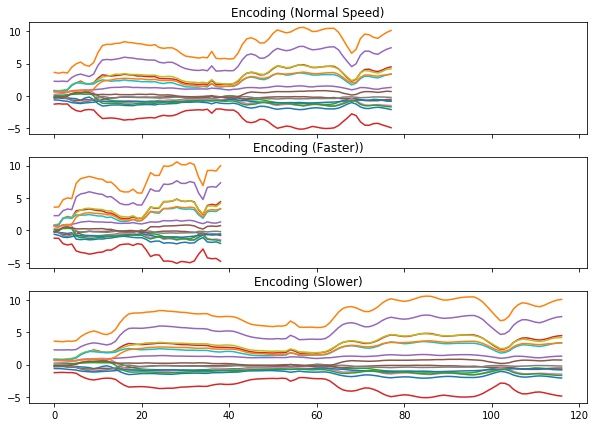

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
axs[0].plot(encoding[0]); 
axs[0].set_title('Encoding (Normal Speed)')
axs[1].plot(encoding_faster[0]);
axs[1].set_title('Encoding (Faster))')
axs[2].plot(encoding_slower[0]);
axs[2].set_title('Encoding (Slower)')

Now let's decode them:

In [23]:
fastgen.synthesize(encoding_faster, checkpoint_path = 'wavenet-ckpt/model.ckpt-200000', save_paths=['gen_faster_' + fname])
fastgen.synthesize(encoding_slower, checkpoint_path = 'wavenet-ckpt/model.ckpt-200000', save_paths=['gen_slower_' + fname])

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


INFO:tensorflow:Sample: 0


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 100


INFO:tensorflow:Sample: 200


INFO:tensorflow:Sample: 300


INFO:tensorflow:Sample: 400


INFO:tensorflow:Sample: 500


INFO:tensorflow:Sample: 600


INFO:tensorflow:Sample: 700


INFO:tensorflow:Sample: 800


INFO:tensorflow:Sample: 900


INFO:tensorflow:Sample: 1000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 1100


INFO:tensorflow:Sample: 1200


INFO:tensorflow:Sample: 1300


INFO:tensorflow:Sample: 1400


INFO:tensorflow:Sample: 1500


INFO:tensorflow:Sample: 1600


INFO:tensorflow:Sample: 1700


INFO:tensorflow:Sample: 1800


INFO:tensorflow:Sample: 1900


INFO:tensorflow:Sample: 2000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 2100


INFO:tensorflow:Sample: 2200


INFO:tensorflow:Sample: 2300


INFO:tensorflow:Sample: 2400


INFO:tensorflow:Sample: 2500


INFO:tensorflow:Sample: 2600


INFO:tensorflow:Sample: 2700


INFO:tensorflow:Sample: 2800


INFO:tensorflow:Sample: 2900


INFO:tensorflow:Sample: 3000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 3100


INFO:tensorflow:Sample: 3200


INFO:tensorflow:Sample: 3300


INFO:tensorflow:Sample: 3400


INFO:tensorflow:Sample: 3500


INFO:tensorflow:Sample: 3600


INFO:tensorflow:Sample: 3700


INFO:tensorflow:Sample: 3800


INFO:tensorflow:Sample: 3900


INFO:tensorflow:Sample: 4000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 4100


INFO:tensorflow:Sample: 4200


INFO:tensorflow:Sample: 4300


INFO:tensorflow:Sample: 4400


INFO:tensorflow:Sample: 4500


INFO:tensorflow:Sample: 4600


INFO:tensorflow:Sample: 4700


INFO:tensorflow:Sample: 4800


INFO:tensorflow:Sample: 4900


INFO:tensorflow:Sample: 5000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 5100


INFO:tensorflow:Sample: 5200


INFO:tensorflow:Sample: 5300


INFO:tensorflow:Sample: 5400


INFO:tensorflow:Sample: 5500


INFO:tensorflow:Sample: 5600


INFO:tensorflow:Sample: 5700


INFO:tensorflow:Sample: 5800


INFO:tensorflow:Sample: 5900


INFO:tensorflow:Sample: 6000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 6100


INFO:tensorflow:Sample: 6200


INFO:tensorflow:Sample: 6300


INFO:tensorflow:Sample: 6400


INFO:tensorflow:Sample: 6500


INFO:tensorflow:Sample: 6600


INFO:tensorflow:Sample: 6700


INFO:tensorflow:Sample: 6800


INFO:tensorflow:Sample: 6900


INFO:tensorflow:Sample: 7000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 7100


INFO:tensorflow:Sample: 7200


INFO:tensorflow:Sample: 7300


INFO:tensorflow:Sample: 7400


INFO:tensorflow:Sample: 7500


INFO:tensorflow:Sample: 7600


INFO:tensorflow:Sample: 7700


INFO:tensorflow:Sample: 7800


INFO:tensorflow:Sample: 7900


INFO:tensorflow:Sample: 8000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 8100


INFO:tensorflow:Sample: 8200


INFO:tensorflow:Sample: 8300


INFO:tensorflow:Sample: 8400


INFO:tensorflow:Sample: 8500


INFO:tensorflow:Sample: 8600


INFO:tensorflow:Sample: 8700


INFO:tensorflow:Sample: 8800


INFO:tensorflow:Sample: 8900


INFO:tensorflow:Sample: 9000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 9100


INFO:tensorflow:Sample: 9200


INFO:tensorflow:Sample: 9300


INFO:tensorflow:Sample: 9400


INFO:tensorflow:Sample: 9500


INFO:tensorflow:Sample: 9600


INFO:tensorflow:Sample: 9700


INFO:tensorflow:Sample: 9800


INFO:tensorflow:Sample: 9900


INFO:tensorflow:Sample: 10000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 10100


INFO:tensorflow:Sample: 10200


INFO:tensorflow:Sample: 10300


INFO:tensorflow:Sample: 10400


INFO:tensorflow:Sample: 10500


INFO:tensorflow:Sample: 10600


INFO:tensorflow:Sample: 10700


INFO:tensorflow:Sample: 10800


INFO:tensorflow:Sample: 10900


INFO:tensorflow:Sample: 11000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 11100


INFO:tensorflow:Sample: 11200


INFO:tensorflow:Sample: 11300


INFO:tensorflow:Sample: 11400


INFO:tensorflow:Sample: 11500


INFO:tensorflow:Sample: 11600


INFO:tensorflow:Sample: 11700


INFO:tensorflow:Sample: 11800


INFO:tensorflow:Sample: 11900


INFO:tensorflow:Sample: 12000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 12100


INFO:tensorflow:Sample: 12200


INFO:tensorflow:Sample: 12300


INFO:tensorflow:Sample: 12400


INFO:tensorflow:Sample: 12500


INFO:tensorflow:Sample: 12600


INFO:tensorflow:Sample: 12700


INFO:tensorflow:Sample: 12800


INFO:tensorflow:Sample: 12900


INFO:tensorflow:Sample: 13000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 13100


INFO:tensorflow:Sample: 13200


INFO:tensorflow:Sample: 13300


INFO:tensorflow:Sample: 13400


INFO:tensorflow:Sample: 13500


INFO:tensorflow:Sample: 13600


INFO:tensorflow:Sample: 13700


INFO:tensorflow:Sample: 13800


INFO:tensorflow:Sample: 13900


INFO:tensorflow:Sample: 14000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 14100


INFO:tensorflow:Sample: 14200


INFO:tensorflow:Sample: 14300


INFO:tensorflow:Sample: 14400


INFO:tensorflow:Sample: 14500


INFO:tensorflow:Sample: 14600


INFO:tensorflow:Sample: 14700


INFO:tensorflow:Sample: 14800


INFO:tensorflow:Sample: 14900


INFO:tensorflow:Sample: 15000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 15100


INFO:tensorflow:Sample: 15200


INFO:tensorflow:Sample: 15300


INFO:tensorflow:Sample: 15400


INFO:tensorflow:Sample: 15500


INFO:tensorflow:Sample: 15600


INFO:tensorflow:Sample: 15700


INFO:tensorflow:Sample: 15800


INFO:tensorflow:Sample: 15900


INFO:tensorflow:Sample: 16000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 16100


INFO:tensorflow:Sample: 16200


INFO:tensorflow:Sample: 16300


INFO:tensorflow:Sample: 16400


INFO:tensorflow:Sample: 16500


INFO:tensorflow:Sample: 16600


INFO:tensorflow:Sample: 16700


INFO:tensorflow:Sample: 16800


INFO:tensorflow:Sample: 16900


INFO:tensorflow:Sample: 17000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 17100


INFO:tensorflow:Sample: 17200


INFO:tensorflow:Sample: 17300


INFO:tensorflow:Sample: 17400


INFO:tensorflow:Sample: 17500


INFO:tensorflow:Sample: 17600


INFO:tensorflow:Sample: 17700


INFO:tensorflow:Sample: 17800


INFO:tensorflow:Sample: 17900


INFO:tensorflow:Sample: 18000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 18100


INFO:tensorflow:Sample: 18200


INFO:tensorflow:Sample: 18300


INFO:tensorflow:Sample: 18400


INFO:tensorflow:Sample: 18500


INFO:tensorflow:Sample: 18600


INFO:tensorflow:Sample: 18700


INFO:tensorflow:Sample: 18800


INFO:tensorflow:Sample: 18900


INFO:tensorflow:Sample: 19000


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Sample: 19100


INFO:tensorflow:Sample: 19200


INFO:tensorflow:Sample: 19300


INFO:tensorflow:Sample: 19400


INFO:tensorflow:Sample: 19500


INFO:tensorflow:Sample: 19600


INFO:tensorflow:Sample: 19700


INFO:tensorflow:Sample: 19800


INFO:tensorflow:Sample: 19900


INFO:tensorflow:Saving: gen_faster_recording.wav


INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


INFO:tensorflow:Sample: 0


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 100


INFO:tensorflow:Sample: 200


INFO:tensorflow:Sample: 300


INFO:tensorflow:Sample: 400


INFO:tensorflow:Sample: 500


INFO:tensorflow:Sample: 600


INFO:tensorflow:Sample: 700


INFO:tensorflow:Sample: 800


INFO:tensorflow:Sample: 900


INFO:tensorflow:Sample: 1000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 1100


INFO:tensorflow:Sample: 1200


INFO:tensorflow:Sample: 1300


INFO:tensorflow:Sample: 1400


INFO:tensorflow:Sample: 1500


INFO:tensorflow:Sample: 1600


INFO:tensorflow:Sample: 1700


INFO:tensorflow:Sample: 1800


INFO:tensorflow:Sample: 1900


INFO:tensorflow:Sample: 2000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 2100


INFO:tensorflow:Sample: 2200


INFO:tensorflow:Sample: 2300


INFO:tensorflow:Sample: 2400


INFO:tensorflow:Sample: 2500


INFO:tensorflow:Sample: 2600


INFO:tensorflow:Sample: 2700


INFO:tensorflow:Sample: 2800


INFO:tensorflow:Sample: 2900


INFO:tensorflow:Sample: 3000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 3100


INFO:tensorflow:Sample: 3200


INFO:tensorflow:Sample: 3300


INFO:tensorflow:Sample: 3400


INFO:tensorflow:Sample: 3500


INFO:tensorflow:Sample: 3600


INFO:tensorflow:Sample: 3700


INFO:tensorflow:Sample: 3800


INFO:tensorflow:Sample: 3900


INFO:tensorflow:Sample: 4000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 4100


INFO:tensorflow:Sample: 4200


INFO:tensorflow:Sample: 4300


INFO:tensorflow:Sample: 4400


INFO:tensorflow:Sample: 4500


INFO:tensorflow:Sample: 4600


INFO:tensorflow:Sample: 4700


INFO:tensorflow:Sample: 4800


INFO:tensorflow:Sample: 4900


INFO:tensorflow:Sample: 5000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 5100


INFO:tensorflow:Sample: 5200


INFO:tensorflow:Sample: 5300


INFO:tensorflow:Sample: 5400


INFO:tensorflow:Sample: 5500


INFO:tensorflow:Sample: 5600


INFO:tensorflow:Sample: 5700


INFO:tensorflow:Sample: 5800


INFO:tensorflow:Sample: 5900


INFO:tensorflow:Sample: 6000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 6100


INFO:tensorflow:Sample: 6200


INFO:tensorflow:Sample: 6300


INFO:tensorflow:Sample: 6400


INFO:tensorflow:Sample: 6500


INFO:tensorflow:Sample: 6600


INFO:tensorflow:Sample: 6700


INFO:tensorflow:Sample: 6800


INFO:tensorflow:Sample: 6900


INFO:tensorflow:Sample: 7000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 7100


INFO:tensorflow:Sample: 7200


INFO:tensorflow:Sample: 7300


INFO:tensorflow:Sample: 7400


INFO:tensorflow:Sample: 7500


INFO:tensorflow:Sample: 7600


INFO:tensorflow:Sample: 7700


INFO:tensorflow:Sample: 7800


INFO:tensorflow:Sample: 7900


INFO:tensorflow:Sample: 8000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 8100


INFO:tensorflow:Sample: 8200


INFO:tensorflow:Sample: 8300


INFO:tensorflow:Sample: 8400


INFO:tensorflow:Sample: 8500


INFO:tensorflow:Sample: 8600


INFO:tensorflow:Sample: 8700


INFO:tensorflow:Sample: 8800


INFO:tensorflow:Sample: 8900


INFO:tensorflow:Sample: 9000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 9100


INFO:tensorflow:Sample: 9200


INFO:tensorflow:Sample: 9300


INFO:tensorflow:Sample: 9400


INFO:tensorflow:Sample: 9500


INFO:tensorflow:Sample: 9600


INFO:tensorflow:Sample: 9700


INFO:tensorflow:Sample: 9800


INFO:tensorflow:Sample: 9900


INFO:tensorflow:Sample: 10000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 10100


INFO:tensorflow:Sample: 10200


INFO:tensorflow:Sample: 10300


INFO:tensorflow:Sample: 10400


INFO:tensorflow:Sample: 10500


INFO:tensorflow:Sample: 10600


INFO:tensorflow:Sample: 10700


INFO:tensorflow:Sample: 10800


INFO:tensorflow:Sample: 10900


INFO:tensorflow:Sample: 11000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 11100


INFO:tensorflow:Sample: 11200


INFO:tensorflow:Sample: 11300


INFO:tensorflow:Sample: 11400


INFO:tensorflow:Sample: 11500


INFO:tensorflow:Sample: 11600


INFO:tensorflow:Sample: 11700


INFO:tensorflow:Sample: 11800


INFO:tensorflow:Sample: 11900


INFO:tensorflow:Sample: 12000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 12100


INFO:tensorflow:Sample: 12200


INFO:tensorflow:Sample: 12300


INFO:tensorflow:Sample: 12400


INFO:tensorflow:Sample: 12500


INFO:tensorflow:Sample: 12600


INFO:tensorflow:Sample: 12700


INFO:tensorflow:Sample: 12800


INFO:tensorflow:Sample: 12900


INFO:tensorflow:Sample: 13000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 13100


INFO:tensorflow:Sample: 13200


INFO:tensorflow:Sample: 13300


INFO:tensorflow:Sample: 13400


INFO:tensorflow:Sample: 13500


INFO:tensorflow:Sample: 13600


INFO:tensorflow:Sample: 13700


INFO:tensorflow:Sample: 13800


INFO:tensorflow:Sample: 13900


INFO:tensorflow:Sample: 14000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 14100


INFO:tensorflow:Sample: 14200


INFO:tensorflow:Sample: 14300


INFO:tensorflow:Sample: 14400


INFO:tensorflow:Sample: 14500


INFO:tensorflow:Sample: 14600


INFO:tensorflow:Sample: 14700


INFO:tensorflow:Sample: 14800


INFO:tensorflow:Sample: 14900


INFO:tensorflow:Sample: 15000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 15100


INFO:tensorflow:Sample: 15200


INFO:tensorflow:Sample: 15300


INFO:tensorflow:Sample: 15400


INFO:tensorflow:Sample: 15500


INFO:tensorflow:Sample: 15600


INFO:tensorflow:Sample: 15700


INFO:tensorflow:Sample: 15800


INFO:tensorflow:Sample: 15900


INFO:tensorflow:Sample: 16000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 16100


INFO:tensorflow:Sample: 16200


INFO:tensorflow:Sample: 16300


INFO:tensorflow:Sample: 16400


INFO:tensorflow:Sample: 16500


INFO:tensorflow:Sample: 16600


INFO:tensorflow:Sample: 16700


INFO:tensorflow:Sample: 16800


INFO:tensorflow:Sample: 16900


INFO:tensorflow:Sample: 17000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 17100


INFO:tensorflow:Sample: 17200


INFO:tensorflow:Sample: 17300


INFO:tensorflow:Sample: 17400


INFO:tensorflow:Sample: 17500


INFO:tensorflow:Sample: 17600


INFO:tensorflow:Sample: 17700


INFO:tensorflow:Sample: 17800


INFO:tensorflow:Sample: 17900


INFO:tensorflow:Sample: 18000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 18100


INFO:tensorflow:Sample: 18200


INFO:tensorflow:Sample: 18300


INFO:tensorflow:Sample: 18400


INFO:tensorflow:Sample: 18500


INFO:tensorflow:Sample: 18600


INFO:tensorflow:Sample: 18700


INFO:tensorflow:Sample: 18800


INFO:tensorflow:Sample: 18900


INFO:tensorflow:Sample: 19000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 19100


INFO:tensorflow:Sample: 19200


INFO:tensorflow:Sample: 19300


INFO:tensorflow:Sample: 19400


INFO:tensorflow:Sample: 19500


INFO:tensorflow:Sample: 19600


INFO:tensorflow:Sample: 19700


INFO:tensorflow:Sample: 19800


INFO:tensorflow:Sample: 19900


INFO:tensorflow:Sample: 20000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 20100


INFO:tensorflow:Sample: 20200


INFO:tensorflow:Sample: 20300


INFO:tensorflow:Sample: 20400


INFO:tensorflow:Sample: 20500


INFO:tensorflow:Sample: 20600


INFO:tensorflow:Sample: 20700


INFO:tensorflow:Sample: 20800


INFO:tensorflow:Sample: 20900


INFO:tensorflow:Sample: 21000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 21100


INFO:tensorflow:Sample: 21200


INFO:tensorflow:Sample: 21300


INFO:tensorflow:Sample: 21400


INFO:tensorflow:Sample: 21500


INFO:tensorflow:Sample: 21600


INFO:tensorflow:Sample: 21700


INFO:tensorflow:Sample: 21800


INFO:tensorflow:Sample: 21900


INFO:tensorflow:Sample: 22000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 22100


INFO:tensorflow:Sample: 22200


INFO:tensorflow:Sample: 22300


INFO:tensorflow:Sample: 22400


INFO:tensorflow:Sample: 22500


INFO:tensorflow:Sample: 22600


INFO:tensorflow:Sample: 22700


INFO:tensorflow:Sample: 22800


INFO:tensorflow:Sample: 22900


INFO:tensorflow:Sample: 23000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 23100


INFO:tensorflow:Sample: 23200


INFO:tensorflow:Sample: 23300


INFO:tensorflow:Sample: 23400


INFO:tensorflow:Sample: 23500


INFO:tensorflow:Sample: 23600


INFO:tensorflow:Sample: 23700


INFO:tensorflow:Sample: 23800


INFO:tensorflow:Sample: 23900


INFO:tensorflow:Sample: 24000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 24100


INFO:tensorflow:Sample: 24200


INFO:tensorflow:Sample: 24300


INFO:tensorflow:Sample: 24400


INFO:tensorflow:Sample: 24500


INFO:tensorflow:Sample: 24600


INFO:tensorflow:Sample: 24700


INFO:tensorflow:Sample: 24800


INFO:tensorflow:Sample: 24900


INFO:tensorflow:Sample: 25000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 25100


INFO:tensorflow:Sample: 25200


INFO:tensorflow:Sample: 25300


INFO:tensorflow:Sample: 25400


INFO:tensorflow:Sample: 25500


INFO:tensorflow:Sample: 25600


INFO:tensorflow:Sample: 25700


INFO:tensorflow:Sample: 25800


INFO:tensorflow:Sample: 25900


INFO:tensorflow:Sample: 26000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 26100


INFO:tensorflow:Sample: 26200


INFO:tensorflow:Sample: 26300


INFO:tensorflow:Sample: 26400


INFO:tensorflow:Sample: 26500


INFO:tensorflow:Sample: 26600


INFO:tensorflow:Sample: 26700


INFO:tensorflow:Sample: 26800


INFO:tensorflow:Sample: 26900


INFO:tensorflow:Sample: 27000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 27100


INFO:tensorflow:Sample: 27200


INFO:tensorflow:Sample: 27300


INFO:tensorflow:Sample: 27400


INFO:tensorflow:Sample: 27500


INFO:tensorflow:Sample: 27600


INFO:tensorflow:Sample: 27700


INFO:tensorflow:Sample: 27800


INFO:tensorflow:Sample: 27900


INFO:tensorflow:Sample: 28000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 28100


INFO:tensorflow:Sample: 28200


INFO:tensorflow:Sample: 28300


INFO:tensorflow:Sample: 28400


INFO:tensorflow:Sample: 28500


INFO:tensorflow:Sample: 28600


INFO:tensorflow:Sample: 28700


INFO:tensorflow:Sample: 28800


INFO:tensorflow:Sample: 28900


INFO:tensorflow:Sample: 29000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 29100


INFO:tensorflow:Sample: 29200


INFO:tensorflow:Sample: 29300


INFO:tensorflow:Sample: 29400


INFO:tensorflow:Sample: 29500


INFO:tensorflow:Sample: 29600


INFO:tensorflow:Sample: 29700


INFO:tensorflow:Sample: 29800


INFO:tensorflow:Sample: 29900


INFO:tensorflow:Sample: 30000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 30100


INFO:tensorflow:Sample: 30200


INFO:tensorflow:Sample: 30300


INFO:tensorflow:Sample: 30400


INFO:tensorflow:Sample: 30500


INFO:tensorflow:Sample: 30600


INFO:tensorflow:Sample: 30700


INFO:tensorflow:Sample: 30800


INFO:tensorflow:Sample: 30900


INFO:tensorflow:Sample: 31000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 31100


INFO:tensorflow:Sample: 31200


INFO:tensorflow:Sample: 31300


INFO:tensorflow:Sample: 31400


INFO:tensorflow:Sample: 31500


INFO:tensorflow:Sample: 31600


INFO:tensorflow:Sample: 31700


INFO:tensorflow:Sample: 31800


INFO:tensorflow:Sample: 31900


INFO:tensorflow:Sample: 32000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 32100


INFO:tensorflow:Sample: 32200


INFO:tensorflow:Sample: 32300


INFO:tensorflow:Sample: 32400


INFO:tensorflow:Sample: 32500


INFO:tensorflow:Sample: 32600


INFO:tensorflow:Sample: 32700


INFO:tensorflow:Sample: 32800


INFO:tensorflow:Sample: 32900


INFO:tensorflow:Sample: 33000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 33100


INFO:tensorflow:Sample: 33200


INFO:tensorflow:Sample: 33300


INFO:tensorflow:Sample: 33400


INFO:tensorflow:Sample: 33500


INFO:tensorflow:Sample: 33600


INFO:tensorflow:Sample: 33700


INFO:tensorflow:Sample: 33800


INFO:tensorflow:Sample: 33900


INFO:tensorflow:Sample: 34000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 34100


INFO:tensorflow:Sample: 34200


INFO:tensorflow:Sample: 34300


INFO:tensorflow:Sample: 34400


INFO:tensorflow:Sample: 34500


INFO:tensorflow:Sample: 34600


INFO:tensorflow:Sample: 34700


INFO:tensorflow:Sample: 34800


INFO:tensorflow:Sample: 34900


INFO:tensorflow:Sample: 35000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 35100


INFO:tensorflow:Sample: 35200


INFO:tensorflow:Sample: 35300


INFO:tensorflow:Sample: 35400


INFO:tensorflow:Sample: 35500


INFO:tensorflow:Sample: 35600


INFO:tensorflow:Sample: 35700


INFO:tensorflow:Sample: 35800


INFO:tensorflow:Sample: 35900


INFO:tensorflow:Sample: 36000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 36100


INFO:tensorflow:Sample: 36200


INFO:tensorflow:Sample: 36300


INFO:tensorflow:Sample: 36400


INFO:tensorflow:Sample: 36500


INFO:tensorflow:Sample: 36600


INFO:tensorflow:Sample: 36700


INFO:tensorflow:Sample: 36800


INFO:tensorflow:Sample: 36900


INFO:tensorflow:Sample: 37000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 37100


INFO:tensorflow:Sample: 37200


INFO:tensorflow:Sample: 37300


INFO:tensorflow:Sample: 37400


INFO:tensorflow:Sample: 37500


INFO:tensorflow:Sample: 37600


INFO:tensorflow:Sample: 37700


INFO:tensorflow:Sample: 37800


INFO:tensorflow:Sample: 37900


INFO:tensorflow:Sample: 38000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 38100


INFO:tensorflow:Sample: 38200


INFO:tensorflow:Sample: 38300


INFO:tensorflow:Sample: 38400


INFO:tensorflow:Sample: 38500


INFO:tensorflow:Sample: 38600


INFO:tensorflow:Sample: 38700


INFO:tensorflow:Sample: 38800


INFO:tensorflow:Sample: 38900


INFO:tensorflow:Sample: 39000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 39100


INFO:tensorflow:Sample: 39200


INFO:tensorflow:Sample: 39300


INFO:tensorflow:Sample: 39400


INFO:tensorflow:Sample: 39500


INFO:tensorflow:Sample: 39600


INFO:tensorflow:Sample: 39700


INFO:tensorflow:Sample: 39800


INFO:tensorflow:Sample: 39900


INFO:tensorflow:Sample: 40000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 40100


INFO:tensorflow:Sample: 40200


INFO:tensorflow:Sample: 40300


INFO:tensorflow:Sample: 40400


INFO:tensorflow:Sample: 40500


INFO:tensorflow:Sample: 40600


INFO:tensorflow:Sample: 40700


INFO:tensorflow:Sample: 40800


INFO:tensorflow:Sample: 40900


INFO:tensorflow:Sample: 41000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 41100


INFO:tensorflow:Sample: 41200


INFO:tensorflow:Sample: 41300


INFO:tensorflow:Sample: 41400


INFO:tensorflow:Sample: 41500


INFO:tensorflow:Sample: 41600


INFO:tensorflow:Sample: 41700


INFO:tensorflow:Sample: 41800


INFO:tensorflow:Sample: 41900


INFO:tensorflow:Sample: 42000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 42100


INFO:tensorflow:Sample: 42200


INFO:tensorflow:Sample: 42300


INFO:tensorflow:Sample: 42400


INFO:tensorflow:Sample: 42500


INFO:tensorflow:Sample: 42600


INFO:tensorflow:Sample: 42700


INFO:tensorflow:Sample: 42800


INFO:tensorflow:Sample: 42900


INFO:tensorflow:Sample: 43000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 43100


INFO:tensorflow:Sample: 43200


INFO:tensorflow:Sample: 43300


INFO:tensorflow:Sample: 43400


INFO:tensorflow:Sample: 43500


INFO:tensorflow:Sample: 43600


INFO:tensorflow:Sample: 43700


INFO:tensorflow:Sample: 43800


INFO:tensorflow:Sample: 43900


INFO:tensorflow:Sample: 44000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 44100


INFO:tensorflow:Sample: 44200


INFO:tensorflow:Sample: 44300


INFO:tensorflow:Sample: 44400


INFO:tensorflow:Sample: 44500


INFO:tensorflow:Sample: 44600


INFO:tensorflow:Sample: 44700


INFO:tensorflow:Sample: 44800


INFO:tensorflow:Sample: 44900


INFO:tensorflow:Sample: 45000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 45100


INFO:tensorflow:Sample: 45200


INFO:tensorflow:Sample: 45300


INFO:tensorflow:Sample: 45400


INFO:tensorflow:Sample: 45500


INFO:tensorflow:Sample: 45600


INFO:tensorflow:Sample: 45700


INFO:tensorflow:Sample: 45800


INFO:tensorflow:Sample: 45900


INFO:tensorflow:Sample: 46000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 46100


INFO:tensorflow:Sample: 46200


INFO:tensorflow:Sample: 46300


INFO:tensorflow:Sample: 46400


INFO:tensorflow:Sample: 46500


INFO:tensorflow:Sample: 46600


INFO:tensorflow:Sample: 46700


INFO:tensorflow:Sample: 46800


INFO:tensorflow:Sample: 46900


INFO:tensorflow:Sample: 47000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 47100


INFO:tensorflow:Sample: 47200


INFO:tensorflow:Sample: 47300


INFO:tensorflow:Sample: 47400


INFO:tensorflow:Sample: 47500


INFO:tensorflow:Sample: 47600


INFO:tensorflow:Sample: 47700


INFO:tensorflow:Sample: 47800


INFO:tensorflow:Sample: 47900


INFO:tensorflow:Sample: 48000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 48100


INFO:tensorflow:Sample: 48200


INFO:tensorflow:Sample: 48300


INFO:tensorflow:Sample: 48400


INFO:tensorflow:Sample: 48500


INFO:tensorflow:Sample: 48600


INFO:tensorflow:Sample: 48700


INFO:tensorflow:Sample: 48800


INFO:tensorflow:Sample: 48900


INFO:tensorflow:Sample: 49000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 49100


INFO:tensorflow:Sample: 49200


INFO:tensorflow:Sample: 49300


INFO:tensorflow:Sample: 49400


INFO:tensorflow:Sample: 49500


INFO:tensorflow:Sample: 49600


INFO:tensorflow:Sample: 49700


INFO:tensorflow:Sample: 49800


INFO:tensorflow:Sample: 49900


INFO:tensorflow:Sample: 50000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 50100


INFO:tensorflow:Sample: 50200


INFO:tensorflow:Sample: 50300


INFO:tensorflow:Sample: 50400


INFO:tensorflow:Sample: 50500


INFO:tensorflow:Sample: 50600


INFO:tensorflow:Sample: 50700


INFO:tensorflow:Sample: 50800


INFO:tensorflow:Sample: 50900


INFO:tensorflow:Sample: 51000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 51100


INFO:tensorflow:Sample: 51200


INFO:tensorflow:Sample: 51300


INFO:tensorflow:Sample: 51400


INFO:tensorflow:Sample: 51500


INFO:tensorflow:Sample: 51600


INFO:tensorflow:Sample: 51700


INFO:tensorflow:Sample: 51800


INFO:tensorflow:Sample: 51900


INFO:tensorflow:Sample: 52000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 52100


INFO:tensorflow:Sample: 52200


INFO:tensorflow:Sample: 52300


INFO:tensorflow:Sample: 52400


INFO:tensorflow:Sample: 52500


INFO:tensorflow:Sample: 52600


INFO:tensorflow:Sample: 52700


INFO:tensorflow:Sample: 52800


INFO:tensorflow:Sample: 52900


INFO:tensorflow:Sample: 53000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 53100


INFO:tensorflow:Sample: 53200


INFO:tensorflow:Sample: 53300


INFO:tensorflow:Sample: 53400


INFO:tensorflow:Sample: 53500


INFO:tensorflow:Sample: 53600


INFO:tensorflow:Sample: 53700


INFO:tensorflow:Sample: 53800


INFO:tensorflow:Sample: 53900


INFO:tensorflow:Sample: 54000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 54100


INFO:tensorflow:Sample: 54200


INFO:tensorflow:Sample: 54300


INFO:tensorflow:Sample: 54400


INFO:tensorflow:Sample: 54500


INFO:tensorflow:Sample: 54600


INFO:tensorflow:Sample: 54700


INFO:tensorflow:Sample: 54800


INFO:tensorflow:Sample: 54900


INFO:tensorflow:Sample: 55000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 55100


INFO:tensorflow:Sample: 55200


INFO:tensorflow:Sample: 55300


INFO:tensorflow:Sample: 55400


INFO:tensorflow:Sample: 55500


INFO:tensorflow:Sample: 55600


INFO:tensorflow:Sample: 55700


INFO:tensorflow:Sample: 55800


INFO:tensorflow:Sample: 55900


INFO:tensorflow:Sample: 56000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 56100


INFO:tensorflow:Sample: 56200


INFO:tensorflow:Sample: 56300


INFO:tensorflow:Sample: 56400


INFO:tensorflow:Sample: 56500


INFO:tensorflow:Sample: 56600


INFO:tensorflow:Sample: 56700


INFO:tensorflow:Sample: 56800


INFO:tensorflow:Sample: 56900


INFO:tensorflow:Sample: 57000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 57100


INFO:tensorflow:Sample: 57200


INFO:tensorflow:Sample: 57300


INFO:tensorflow:Sample: 57400


INFO:tensorflow:Sample: 57500


INFO:tensorflow:Sample: 57600


INFO:tensorflow:Sample: 57700


INFO:tensorflow:Sample: 57800


INFO:tensorflow:Sample: 57900


INFO:tensorflow:Sample: 58000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 58100


INFO:tensorflow:Sample: 58200


INFO:tensorflow:Sample: 58300


INFO:tensorflow:Sample: 58400


INFO:tensorflow:Sample: 58500


INFO:tensorflow:Sample: 58600


INFO:tensorflow:Sample: 58700


INFO:tensorflow:Sample: 58800


INFO:tensorflow:Sample: 58900


INFO:tensorflow:Sample: 59000


INFO:tensorflow:Saving: gen_slower_recording.wav


INFO:tensorflow:Sample: 59100


INFO:tensorflow:Sample: 59200


INFO:tensorflow:Sample: 59300


INFO:tensorflow:Sample: 59400


INFO:tensorflow:Sample: 59500


INFO:tensorflow:Sample: 59600


INFO:tensorflow:Sample: 59700


INFO:tensorflow:Sample: 59800


INFO:tensorflow:Sample: 59900


INFO:tensorflow:Saving: gen_slower_recording.wav


It seems to work pretty well and retains the pitch and timbre of the original sound.  We could even quickly layer the sounds just by adding them.  You might want to do this in a program like Logic or Ableton Live instead and explore more possiblities of these sounds!

# Part 3: Interpolating Sounds

Now let's try something more experimental.  NSynth released plenty of great examples of what happens when you mix the embeddings of different sounds: https://magenta.tensorflow.org/nsynth-instrument - we're going to do the same but now with our own sounds!

First let's load some encodings:

In [24]:
sample_length = 80000

# from https://www.freesound.org/people/MustardPlug/sounds/395058/
aud1, enc1 = load_encoding('395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav', sample_length)

# from https://www.freesound.org/people/xserra/sounds/176098/
aud2, enc2 = load_encoding('176098__xserra__cello-cant-dels-ocells.wav', sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


IOError: [Errno 2] No such file or directory: '/home/yashveer/Documents/VIP/NSynth/176098__xserra__cello-cant-dels-ocells.wav'

Now we'll mix the two audio signals together.  But this is unlike adding the two signals together in a Ableton or simply hearing both sounds at the same time.  Instead, we're averaging the representation of their timbres, tonality, change over time, and resulting audio signal.  This is way more powerful than a simple averaging.

In [ ]:
enc_mix = (enc1 + enc2) / 2.0

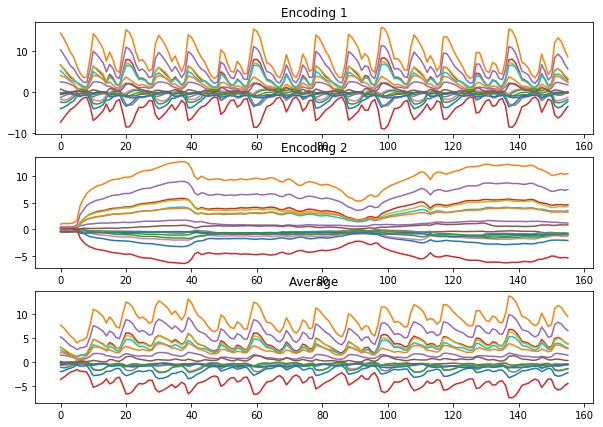

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [ ]:
fastgen.synthesize(enc_mix, save_paths='mix.wav')

As another example of what's possible with interpolation of embeddings, we'll try crossfading between the two embeddings.  To do this, we'll write a utility function which will use a hanning window to apply a fade in or out to the embeddings matrix:

In [42]:
def fade(encoding, mode='in'):
    length = encoding.shape[1]
    fadein = (0.5 * (1.0 - np.cos(3.1415 * np.arange(length) / 
                                  float(length)))).reshape(1, -1, 1)
    if mode == 'in':
        return fadein * encoding
    else:
        return (1.0 - fadein) * encoding

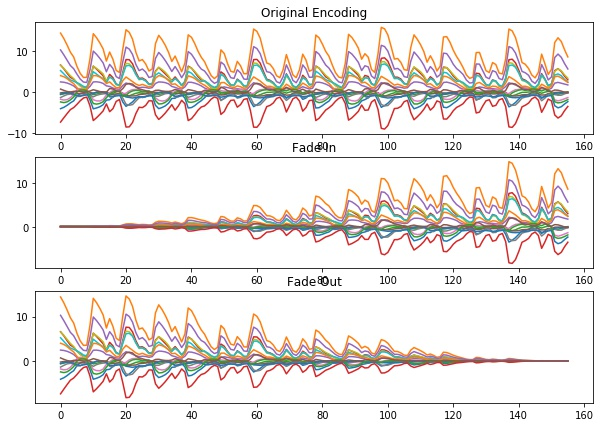

In [62]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Original Encoding')
axs[1].plot(fade(enc1, 'in')[0]);
axs[1].set_title('Fade In')
axs[2].plot(fade(enc1, 'out')[0]);
axs[2].set_title('Fade Out')

Now we can cross fade two different encodings by adding their repsective fade ins and out:

In [45]:
def crossfade(encoding1, encoding2):
    return fade(encoding1, 'out') + fade(encoding2, 'in')

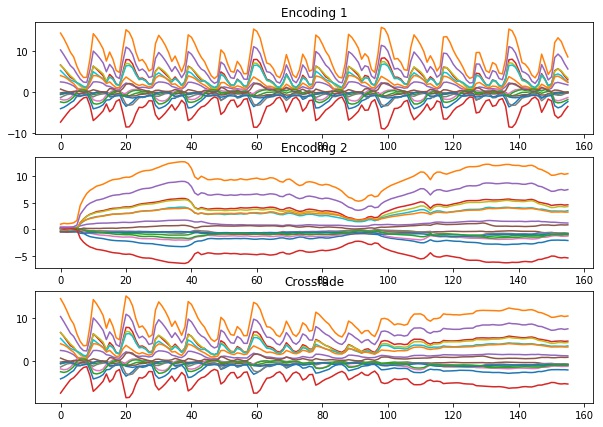

In [63]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(crossfade(enc1, enc2)[0]);
axs[2].set_title('Crossfade')

Now let's synthesize the resulting encodings:

In [ ]:
fastgen.synthesize(crossfade(enc1, enc2), save_paths=['crossfade.wav'])

There is a lot to explore with NSynth.  So far I've just shown you a taste of what's possible when you are able to generate your own sounds.  I expect the generation process will soon get much faster, especially with help from the community, and for more unexpected and interesting applications to emerge.  Please keep in touch with whatever you end up creating, either personally via [twitter](https://twitter.com/pkmital), in our [Creative Applications of Deep Learning](https://www.kadenze.com/programs/creative-applications-of-deep-learning-with-tensorflow) community on Kadenze, or the [Magenta Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/magenta-discuss).